In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Данные

In [47]:
x = np.linspace(0, 40, 20)
y = np.exp((40 - x) / 35) * np.sin(x / 3)

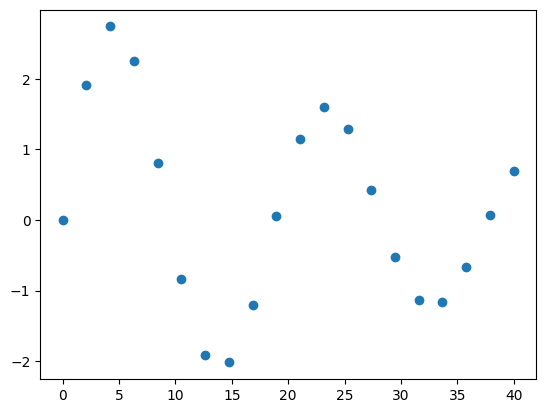

In [16]:
plt.scatter(x, y)

## Кусочно-линейная интерполяция

In [22]:
class PartLinearInterpolation:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __call__(self, x):
        res = []
        for pt in x:
            for i in range(len(self.x) - 1):
                if self.x[i] <= pt <= self.x[i + 1]:
                    l = (pt - self.x[i]) / (self.x[i + 1] - self.x[i])
                    res.append(self.y[i] + l * (self.y[i + 1] - self.y[i]))

        return res

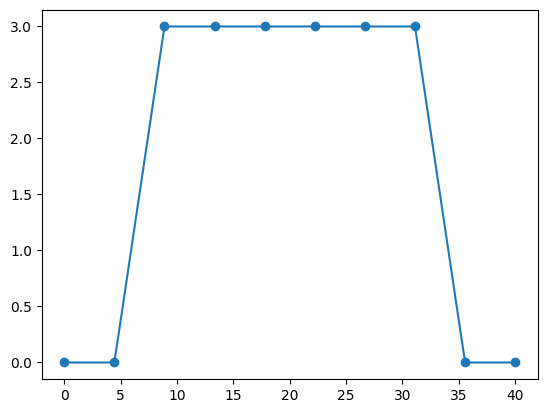

In [67]:
_x = np.linspace(0, 40, 10)
_y = np.array([0] * 10)

_y[2:-2] = 3

plt.scatter(_x, _y)
plt.plot(np.linspace(0, 40, 200), PartLinearInterpolation(_x, _y)(np.linspace(0, 40, 200)))

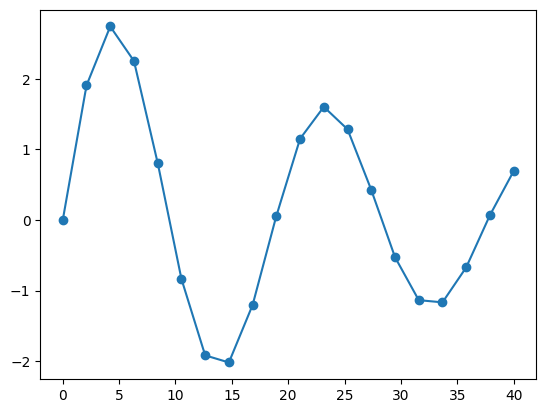

In [23]:
plt.scatter(x, y)
plt.plot(np.linspace(0, 40, 200), PartLinearInterpolation(x, y)(np.linspace(0, 40, 200)))

## Полиномы Лагранжа

In [32]:
class LagrangeInterpolation:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def calc_basis(self, i, x):
        res = 1
        for j in range(len(self.x)):
            if j == i:
                continue

            res *= (x - self.x[j]) / (self.x[i] - self.x[j])
        return res

    def __call__(self, x):
        res = []
        for pt in x:
            val = 0
            for i in range(len(self.x)):
                val += self.y[i] * self.calc_basis(i, pt)
            res.append(val)
        return res

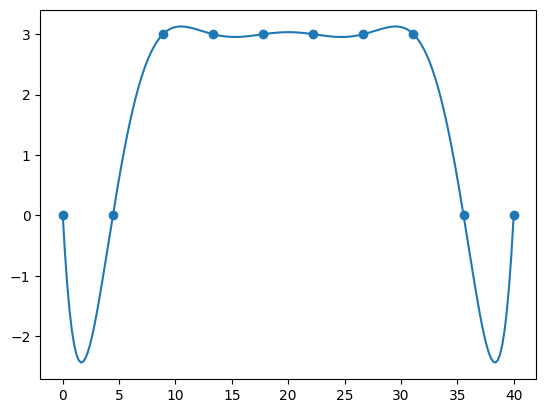

In [42]:
_x = np.linspace(0, 40, 10)
_y = np.array([0] * 10)

_y[2:-2] = 3

plt.scatter(_x, _y)
plt.plot(np.linspace(0, 40, 200), LagrangeInterpolation(_x, _y)(np.linspace(0, 40, 200)))

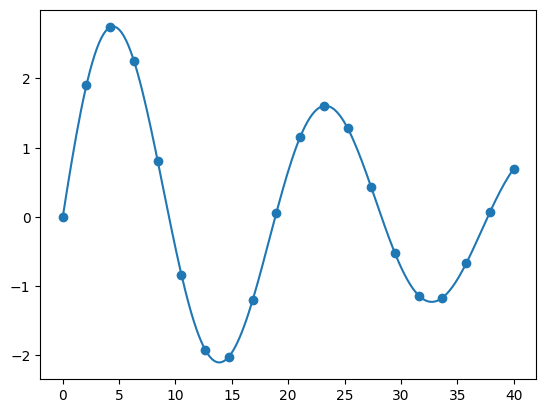

In [33]:
plt.scatter(x, y)
plt.plot(np.linspace(0, 40, 200), LagrangeInterpolation(x, y)(np.linspace(0, 40, 200)))

## Интерполяция Ньютона

In [64]:
class NewtonInterpolation:

    def __init__(self, x, y):
        self.x = x
        self.y = y

        self.diffs = []
        self.calc_diffs()

    def calc_diffs(self):
        for n in range(len(self.x)):
            _sum = 0
            for j in range(n+1):
                denum = 1
                for i in range(n+1):
                    if i == j:
                        continue

                    denum *= self.x[j] - self.x[i]

                _sum += self.y[j] / denum

            self.diffs.append(_sum)

    def calc(self, x):
        _sum = 0

        for i in range(len(self.x)):
            _prod = 1

            for j in range(i):
                _prod *= x-self.x[j]

            _sum += _prod*self.diffs[i]

        return _sum


    def __call__(self, x):
        res = []
        for pt in x:
            res.append(self.calc(pt))
        return res

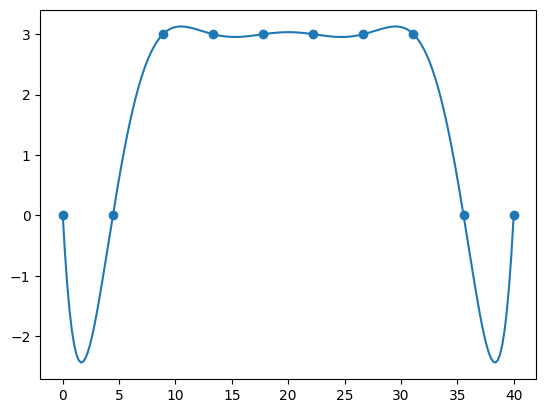

In [69]:
_x = np.linspace(0, 40, 10)
_y = np.array([0] * 10)

_y[2:-2] = 3

plt.scatter(_x, _y)
plt.plot(np.linspace(0, 40, 200), NewtonInterpolation(_x, _y)(np.linspace(0, 40, 200)))

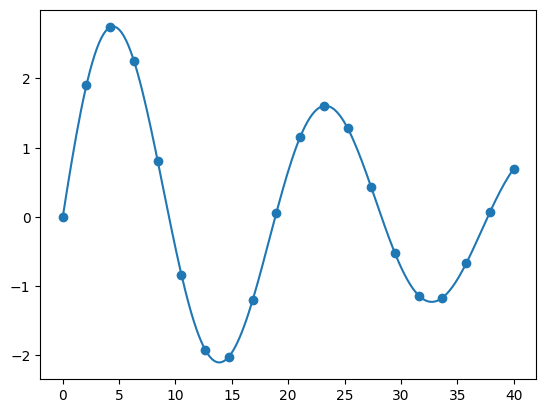

In [65]:
plt.scatter(x, y)
plt.plot(np.linspace(0, 40, 200), NewtonInterpolation(x, y)(np.linspace(0, 40, 200)))